In [ ]:
!pip install kaggle

**Kaggle Integration**

**Upload the kaggle.json file here**

**Setup Kaggle API**

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle (1).json to kaggle (1).json
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle competitions download -c Food-11

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


**Download Dataset**

In [ ]:
!kaggle datasets download -d trolukovich/food11-image-dataset

Dataset URL: https://www.kaggle.com/datasets/trolukovich/food11-image-dataset
License(s): CC0-1.0
100% 1.08G/1.08G [00:09<00:00, 199MB/s]
100% 1.08G/1.08G [00:09<00:00, 126MB/s]


In [ ]:
!unzip food11-image-dataset.zip -d food11

Streaming output truncated to the last 5000 lines.
  inflating: food11/training/Soup/223.jpg  
  inflating: food11/training/Soup/224.jpg  
  inflating: food11/training/Soup/225.jpg  
  inflating: food11/training/Soup/226.jpg  
  inflating: food11/training/Soup/227.jpg  
  inflating: food11/training/Soup/228.jpg  
  inflating: food11/training/Soup/229.jpg  
  inflating: food11/training/Soup/23.jpg  
  inflating: food11/training/Soup/230.jpg  
  inflating: food11/training/Soup/231.jpg  
  inflating: food11/training/Soup/232.jpg  
  inflating: food11/training/Soup/233.jpg  
  inflating: food11/training/Soup/234.jpg  
  inflating: food11/training/Soup/235.jpg  
  inflating: food11/training/Soup/236.jpg  
  inflating: food11/training/Soup/237.jpg  
  inflating: food11/training/Soup/238.jpg  
  inflating: food11/training/Soup/239.jpg  
  inflating: food11/training/Soup/24.jpg  
  inflating: food11/training/Soup/240.jpg  
  inflating: food11/training/Soup/241.jpg  
  inflating: food11/trainin

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import json
import zipfile
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

**Unzip Dataset**

In [ ]:
with zipfile.ZipFile("food11-image-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("food11")


**Define function to load and preprocess images**

In [ ]:
def create_data_generators():
    train_dir = 'food11/training'
    valid_dir = 'food11/validation'
    test_dir = 'food11/evaluation'

    train_datagen = ImageDataGenerator(rescale=1./255)
    valid_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical'
    )

    valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    return train_generator, valid_generator, test_generator

train_generator, valid_generator, test_generator = create_data_generators()


Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.


**Define CNN Model**

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')
])

**Train Model**

In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

Epoch 1/10
309/309 [==============================] - 405s 1s/step - loss: 2.0786 - accuracy: 0.2613 - val_loss: 1.8188 - val_accuracy: 0.3531
Epoch 2/10
309/309 [==============================] - 407s 1s/step - loss: 1.7699 - accuracy: 0.3820 - val_loss: 1.6977 - val_accuracy: 0.3962
Epoch 3/10
309/309 [==============================] - 402s 1s/step - loss: 1.5534 - accuracy: 0.4639 - val_loss: 1.5913 - val_accuracy: 0.4531
Epoch 4/10
309/309 [==============================] - 406s 1s/step - loss: 1.3099 - accuracy: 0.5512 - val_loss: 1.6044 - val_accuracy: 0.4542
Epoch 5/10
309/309 [==============================] - 408s 1s/step - loss: 1.0328 - accuracy: 0.6486 - val_loss: 1.5172 - val_accuracy: 0.5128
Epoch 6/10
309/309 [==============================] - 408s 1s/step - loss: 0.7652 - accuracy: 0.7427 - val_loss: 1.6157 - val_accuracy: 0.5017
Epoch 7/10
309/309 [==============================] - 406s 1s/step - loss: 0.5322 - accuracy: 0.8154 - val_loss: 1.8109 - val_accuracy: 0.4948

**Evaluate Model**

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

105/105 [==============================] - 41s 381ms/step - loss: 2.1277 - accuracy: 0.5474
Test accuracy: 0.5473558306694031


**Plotting Training and Validation Metrics**

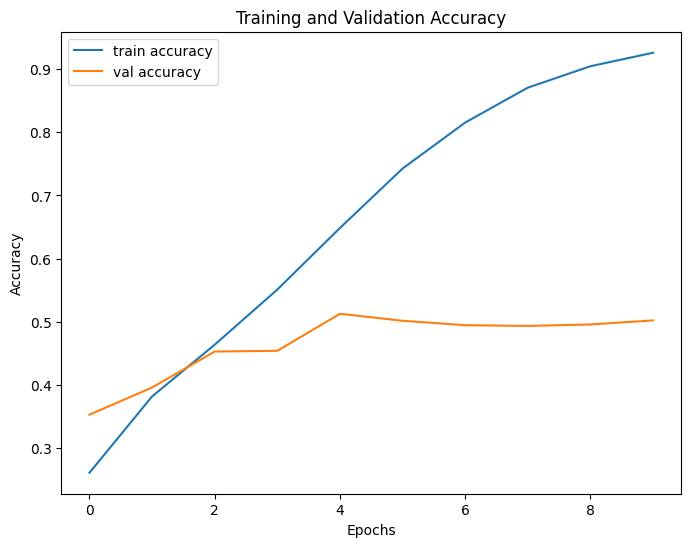

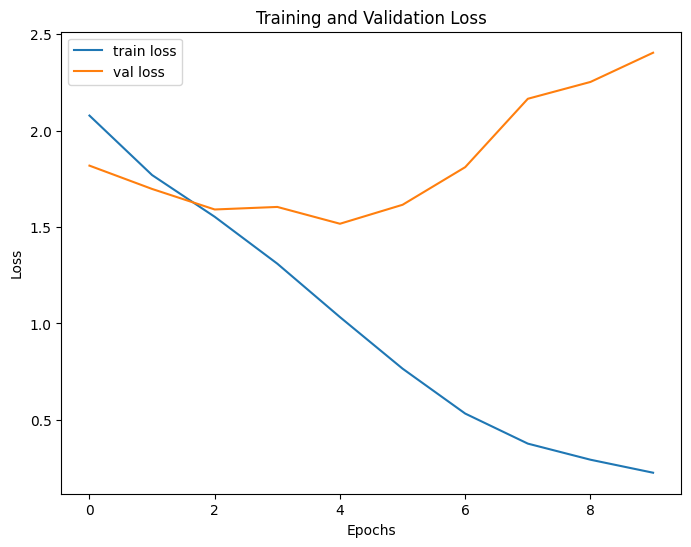

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

**Save report**

In [ ]:
report = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'training_history': history.history
}

with open('report.json', 'w') as f:
    json.dump(report, f)

In [ ]:
def create_data_generators():
    train_dir = 'food11/training'
    valid_dir = 'food11/validation'
    test_dir = 'food11/evaluation'

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    valid_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical'
    )

    valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    return train_generator, valid_generator, test_generator

train_generator, valid_generator, test_generator = create_data_generators()

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

Epoch 1/10
309/309 [==============================] - 447s 1s/step - loss: 2.2315 - accuracy: 0.1936 - val_loss: 2.0940 - val_accuracy: 0.2647
Epoch 2/10
309/309 [==============================] - 439s 1s/step - loss: 2.0590 - accuracy: 0.2696 - val_loss: 1.9060 - val_accuracy: 0.3239
Epoch 3/10
309/309 [==============================] - 439s 1s/step - loss: 1.9569 - accuracy: 0.3075 - val_loss: 1.7952 - val_accuracy: 0.3773
Epoch 4/10
309/309 [==============================] - 436s 1s/step - loss: 1.8679 - accuracy: 0.3497 - val_loss: 1.7293 - val_accuracy: 0.4044
Epoch 5/10
309/309 [==============================] - 431s 1s/step - loss: 1.7970 - accuracy: 0.3719 - val_loss: 1.6544 - val_accuracy: 0.4496
Epoch 6/10
309/309 [==============================] - 431s 1s/step - loss: 1.7167 - accuracy: 0.4030 - val_loss: 1.5869 - val_accuracy: 0.4685
Epoch 7/10
309/309 [==============================] - 431s 1s/step - loss: 1.6635 - accuracy: 0.4278 - val_loss: 1.7242 - val_accuracy: 0.4210

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

105/105 [==============================] - 39s 369ms/step - loss: 1.3471 - accuracy: 0.5438
Test accuracy: 0.5437705516815186


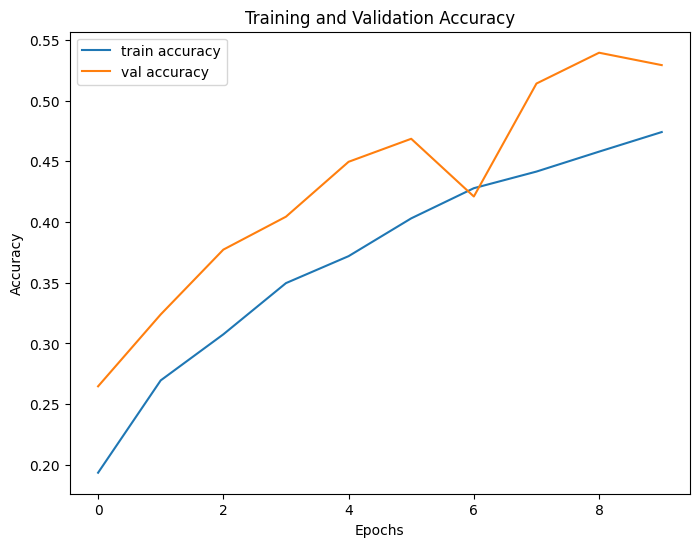

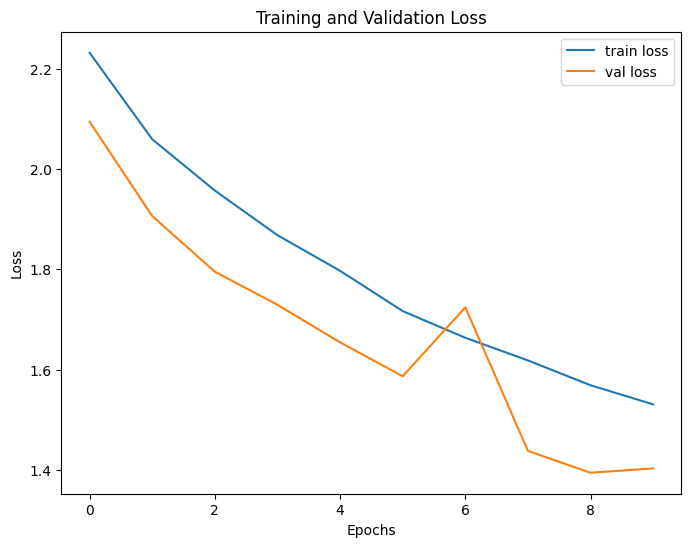

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def create_data_generators():
    train_dir = 'food11/training'
    valid_dir = 'food11/validation'
    test_dir = 'food11/evaluation'

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    valid_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical'
    )

    valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    return train_generator, valid_generator, test_generator

train_generator, valid_generator, test_generator = create_data_generators()

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
history = model.fit(
    train_generator,
    epochs=15,  
    validation_data=valid_generator,
    callbacks=[early_stopping]  
)

Epoch 1/15
309/309 [==============================] - 499s 2s/step - loss: 2.1403 - accuracy: 0.2265 - val_loss: 2.0019 - val_accuracy: 0.2983
Epoch 2/15
309/309 [==============================] - 500s 2s/step - loss: 1.9836 - accuracy: 0.3014 - val_loss: 1.7885 - val_accuracy: 0.3930
Epoch 3/15
309/309 [==============================] - 542s 2s/step - loss: 1.8680 - accuracy: 0.3437 - val_loss: 1.7598 - val_accuracy: 0.3921
Epoch 4/15
309/309 [==============================] - 492s 2s/step - loss: 1.7675 - accuracy: 0.3870 - val_loss: 1.7756 - val_accuracy: 0.3985
Epoch 5/15
309/309 [==============================] - 508s 2s/step - loss: 1.6821 - accuracy: 0.4238 - val_loss: 1.6467 - val_accuracy: 0.4603
Epoch 6/15
309/309 [==============================] - 496s 2s/step - loss: 1.6007 - accuracy: 0.4502 - val_loss: 1.3952 - val_accuracy: 0.5265
Epoch 7/15
309/309 [==============================] - 500s 2s/step - loss: 1.5450 - accuracy: 0.4673 - val_loss: 1.4294 - val_accuracy: 0.5137

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

105/105 [==============================] - 43s 409ms/step - loss: 1.2309 - accuracy: 0.5856
Test accuracy: 0.5855990648269653


Predict on test data

In [ ]:
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

105/105 [==============================] - 44s 416ms/step


Identify correct and incorrect predictions

In [ ]:
correct = np.where(predicted_classes == true_classes)[0]
incorrect = np.where(predicted_classes != true_classes)[0]

def plot_images(indices, correct=True):
    fig, axes = plt.subplots(1, len(indices), figsize=(20, 4))
    for i, idx in enumerate(indices):
        img = test_generator[idx][0][0]
        true_label = class_labels[true_classes[idx]]
        predicted_label = class_labels[predicted_classes[idx]]
        axes[i].imshow(img)
        axes[i].set_title(f"True: {true_label}\nPredicted: {predicted_label}", color="green" if correct else "red")
        axes[i].axis('off')

correct and incorrect predictions

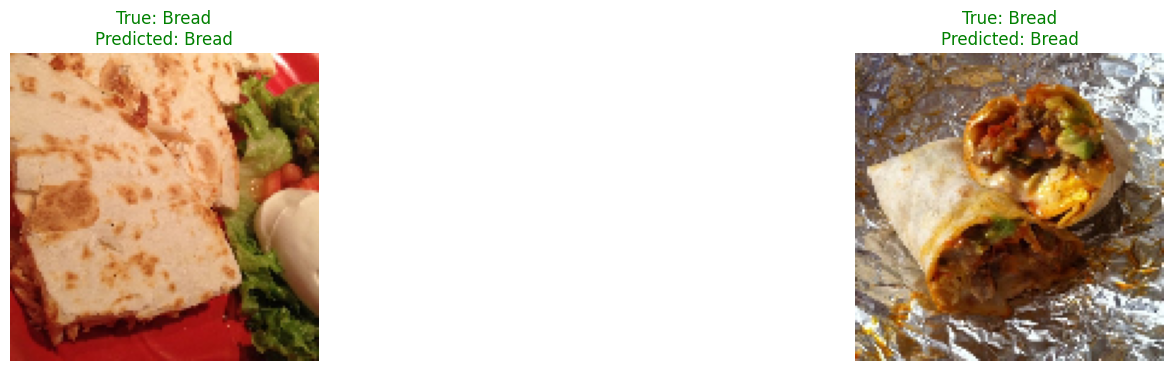

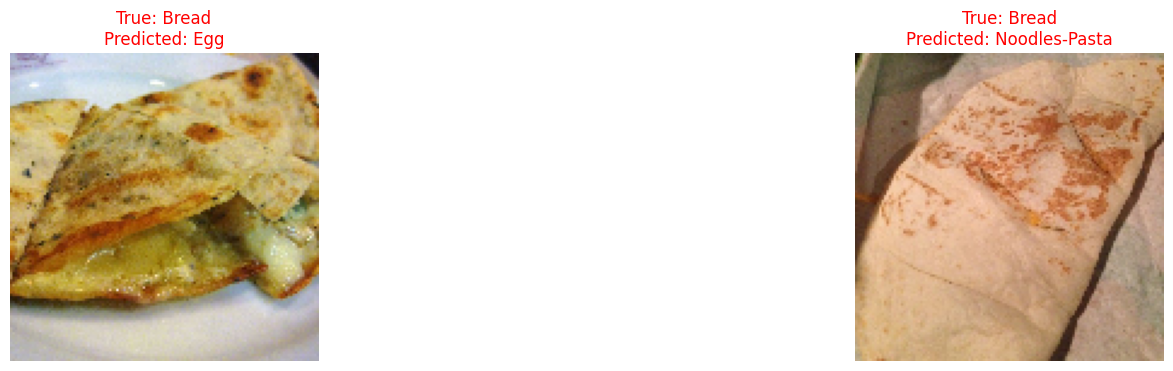

In [ ]:
if len(correct) >= 2:
    plot_images(correct[:2], correct=True)

if len(incorrect) >= 2:
    plot_images(incorrect[:2], correct=False)

plt.show()

Plotting Training and Validation Metrics

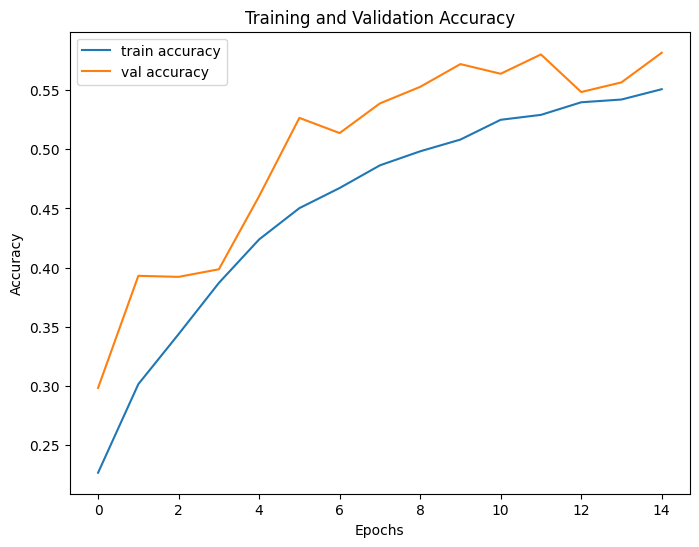

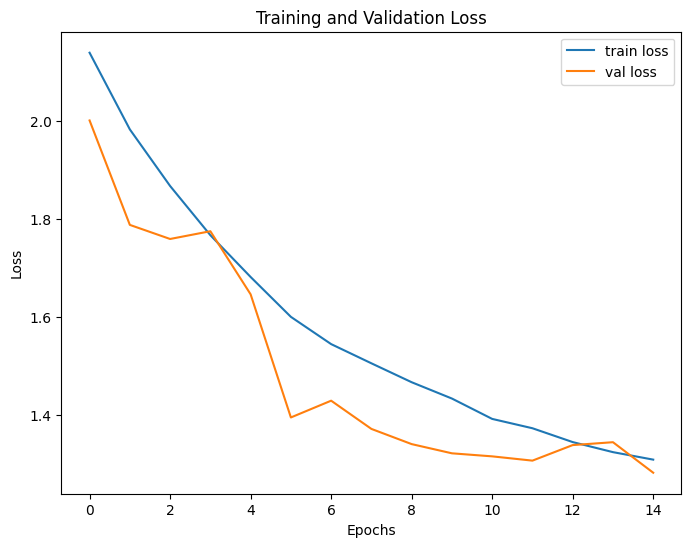

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Save report

In [ ]:
report = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'training_history': history.history
}

with open('report.json', 'w') as f:
    json.dump(report, f)